In [1]:
### Exploratory Data Analysis and Visualization
# Importing Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
import geopandas as gpd

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Country GeoData
# Load the Natural Earth dataset
world = gpd.read_file('./data/natural_earth_geo_admin0/ne_10m_admin_0_countries.shp')

# Group ISO A3 codes by continent
iso_a3_by_continent = world.groupby('CONTINENT')['ISO_A3'].apply(list).to_dict()

# Iterate over the dictionary and remove '-99' values
cleaned_iso = {continent: [country for country in countries if country != '-99'] for continent, countries in iso_a3_by_continent.items()}

In [4]:
## Loading of the datasets
## Agriculture & Rural Development 
# Rural population (% of total population) For the 70 percent of the world's poor who live in rural areas, agriculture is the main source of income and employment. 
# But depletion and degradation of land and water pose serious challenges to producing enough food and other agricultural products to sustain livelihoods here and meet the needs of urban populations. 
# Data presented here include measures of agricultural inputs, outputs, and productivity compiled by the UN's Food and Agriculture Organization.
# Dataset from WorldBank (26-May-2023)
df = pd.read_csv("./data/worldbank_agri/API_1_DS2_en_csv_v2_5455649.csv", skiprows=3)
# https://api.worldbank.org/v2/en/topic/1?downloadformat=csv

In [5]:
# Databank dataset inspection
df.drop(columns=["Unnamed: 67"], inplace=True) #Obsolete column with Null values
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.046919,0.055358,0.092621,0.085188,0.079480,0.076267,0.104098,0.069199,0.102736,NaN
1,Aruba,ABW,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.303687,0.398228,0.496427,0.335550,0.297792,0.311423,0.350670,0.339582,0.353604,NaN
2,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239000,49.254000,49.2700,49.285000,49.300000,...,57.010000,56.959000,56.892000,56.808000,56.707000,56.589000,56.454000,56.303000,56.134000,NaN
3,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.211234,1.577679,1.4226,1.245827,1.065002,...,0.691192,0.601746,0.520623,0.442423,0.358555,0.287256,0.213237,-0.133220,-0.347205,NaN
4,Aruba,ABW,Rural population,SP.RUR.TOTL,26880.000,27481.000000,27918.000000,28318.0000,28673.000000,28980.000000,...,58652.000000,59006.000000,59314.000000,59577.000000,59791.000000,59963.000000,60091.000000,60011.000000,59803.000000,NaN


In [6]:
# Dimensions of DataFrame
df.shape

(11172, 67)

In [7]:
# Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11172 entries, 0 to 11171
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    11172 non-null  object 
 1   Country Code    11172 non-null  object 
 2   Indicator Name  11172 non-null  object 
 3   Indicator Code  11172 non-null  object 
 4   1960            632 non-null    float64
 5   1961            4555 non-null   float64
 6   1962            4748 non-null   float64
 7   1963            4765 non-null   float64
 8   1964            4775 non-null   float64
 9   1965            4826 non-null   float64
 10  1966            4858 non-null   float64
 11  1967            4871 non-null   float64
 12  1968            4889 non-null   float64
 13  1969            4885 non-null   float64
 14  1970            5364 non-null   float64
 15  1971            5368 non-null   float64
 16  1972            5374 non-null   float64
 17  1973            5376 non-null  

In [8]:
# Describe DataFrame - Note this is the summary of all indicators, after preprocessing we will look at better overview.
df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,6.320000e+02,4.555000e+03,4.748000e+03,4.765000e+03,4.775000e+03,4.826000e+03,4.858000e+03,4.871000e+03,4.889000e+03,4.885000e+03,...,7.696000e+03,7.716000e+03,8.776000e+03,7.736000e+03,7.728000e+03,7.711000e+03,7.684000e+03,7.182000e+03,3.540000e+03,170.000000
mean,1.093038e+09,1.654885e+08,1.628815e+08,1.797908e+08,1.983275e+08,2.393604e+08,2.381413e+08,2.499119e+08,2.580527e+08,3.306279e+08,...,4.349823e+09,4.467862e+09,3.778675e+09,4.305758e+09,4.535517e+09,4.600358e+09,4.761723e+09,5.373643e+09,1.217253e+10,1.532650
std,8.458841e+09,3.343148e+09,3.362091e+09,3.735752e+09,4.145210e+09,4.588822e+09,4.568374e+09,4.808793e+09,4.953196e+09,6.608612e+09,...,7.830856e+10,8.069766e+10,7.349175e+10,7.880005e+10,8.280874e+10,8.440930e+10,8.766616e+10,9.616307e+10,1.536880e+11,1.548552
min,0.000000e+00,-2.498824e+00,-3.171646e+00,-3.206682e+00,-3.078607e+00,-3.303554e+00,-3.563265e+00,-3.820587e+00,-1.051712e+01,-1.300982e+01,...,-5.096810e+00,-5.007410e+00,-5.802638e+00,-4.673748e+00,-4.702139e+00,-5.145168e+00,-5.989875e+00,-7.646281e+00,-8.434153e+00,0.024394
25%,6.111000e+01,1.427678e+01,1.162989e+01,1.170793e+01,1.171388e+01,1.197647e+01,1.186685e+01,1.200000e+01,1.210323e+01,1.243000e+01,...,9.454018e+00,1.000000e+01,5.917213e+00,9.960394e+00,9.984725e+00,1.000000e+01,1.017359e+01,8.719629e+00,5.023440e+00,0.717613
50%,9.584850e+01,9.538300e+01,8.596012e+01,8.657000e+01,8.719200e+01,8.648092e+01,8.715750e+01,8.810900e+01,8.808200e+01,8.788000e+01,...,8.878239e+01,9.047000e+01,8.605286e+01,9.227262e+01,9.128500e+01,9.019043e+01,9.186401e+01,7.899754e+01,6.889085e+01,1.098018
75%,4.539689e+06,1.051960e+05,8.646250e+04,8.470000e+04,8.736000e+04,8.981500e+04,8.998100e+04,9.022000e+04,9.117000e+04,9.391000e+04,...,1.900103e+04,1.867001e+04,1.841500e+04,1.841449e+04,1.880100e+04,1.925345e+04,1.967540e+04,1.487000e+04,7.134665e+03,1.801351
max,1.040337e+11,1.079593e+11,1.109413e+11,1.231941e+11,1.366833e+11,1.475283e+11,1.460780e+11,1.547463e+11,1.597173e+11,2.817427e+11,...,3.226817e+12,3.302406e+12,3.177582e+12,3.197479e+12,3.376945e+12,3.419240e+12,3.513631e+12,3.704093e+12,4.154467e+12,10.796677


In [9]:
# Creating a reusable function for plotting missing values
def missing_plot(
        df_missing,
        len_original,
        title='',
        xlabel='Columns',
        ylabel='% of Missing Values',
        cbar_label='% Missing',
        cm=plt.cm.coolwarm,
        hline=False,
        hline_y=0,
        hline_label='Threshold at',
        hline_color='red'
    ):
    # Normalize the missing values to map them to colors
    normalized_values = (df_missing - df_missing.min()) / (df_missing.max() - df_missing.min())
    
    # Create a colormap (you can choose any colormap you like)
    cmap = cm
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(24, 6))
    
    # Create a bar plot with custom colors
    bars = sns.barplot(ax=ax, x=df_missing.index, y=df_missing.values / len_original, palette=cmap(normalized_values))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    
    # Create a color bar legend for reference
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=df_missing.min()/len_original, vmax=df_missing.max()/len_original))
    sm.set_array([])
    
    # Add the colorbar to the same axis (ax) where the bars are plotted
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(cbar_label)

    if hline:
        # Add a custom horizontal line at y = 2 (you can adjust the y-value as needed)
        plt.axhline(y=hline_y, color=hline_color, linestyle='--', label=hline_label)
        plt.legend()
        
    plt.show()

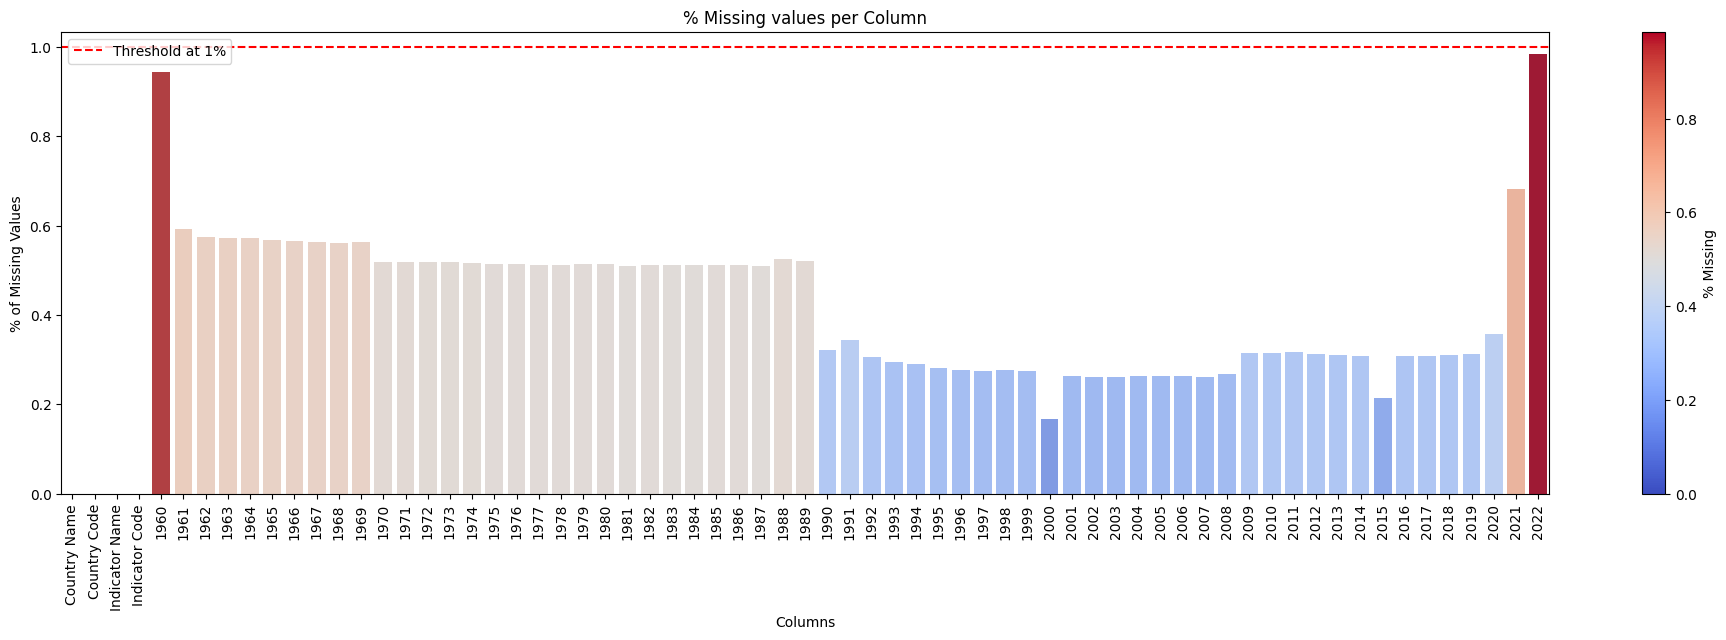

In [10]:
# Lets have a look at the complete dataset with all the indicators included, what we see is that 2022 have relatively many missing values compared to the majority of the dataset.
# In literature having less than 5% missing values is acceptable but for sake of demonstration we will show how they are dropped. Despite the low amount of missing values there could be some change that we want to leave out.

# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_plot(missing_values, df.shape[0], '% Missing values per Column', hline_y=1, hline=True, hline_label='Threshold at 1%')

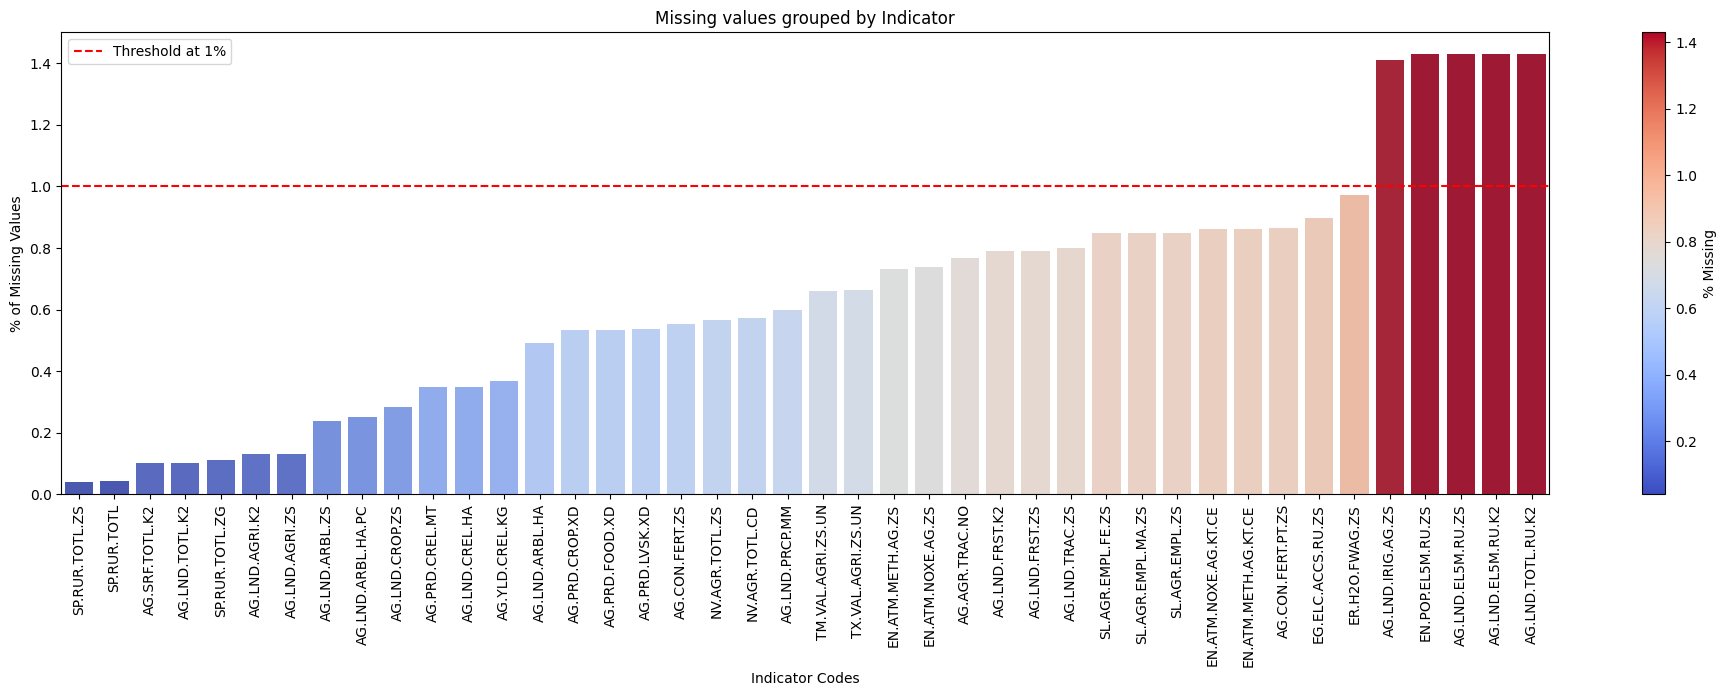

In [11]:
# Here is visualized how many missing values per indicator summed over all columns exist. This also provides us with insights on how many missing values we deem acceptable.
# For the visualization we want to use the indicators with minimal missing values, for reference a hline of 2000 is also plotted.
#
# The indicator that will be used for the GeoData Visualization is:
# SP.RUR.TOTL.ZS

group_by_indicator = df.groupby('Indicator Code')
missing_values_per_indicator = (group_by_indicator.apply(lambda x: x.isna().sum()))
missing_values_per_indicator_t = missing_values_per_indicator.transpose().sum()
missing_values_per_indicator_t_sorted = missing_values_per_indicator_t.sort_values()
missing_plot(missing_values_per_indicator_t_sorted,df.shape[0],'Missing values grouped by Indicator',xlabel='Indicator Codes',hline=True,hline_y=1,hline_label='Threshold at 1%')


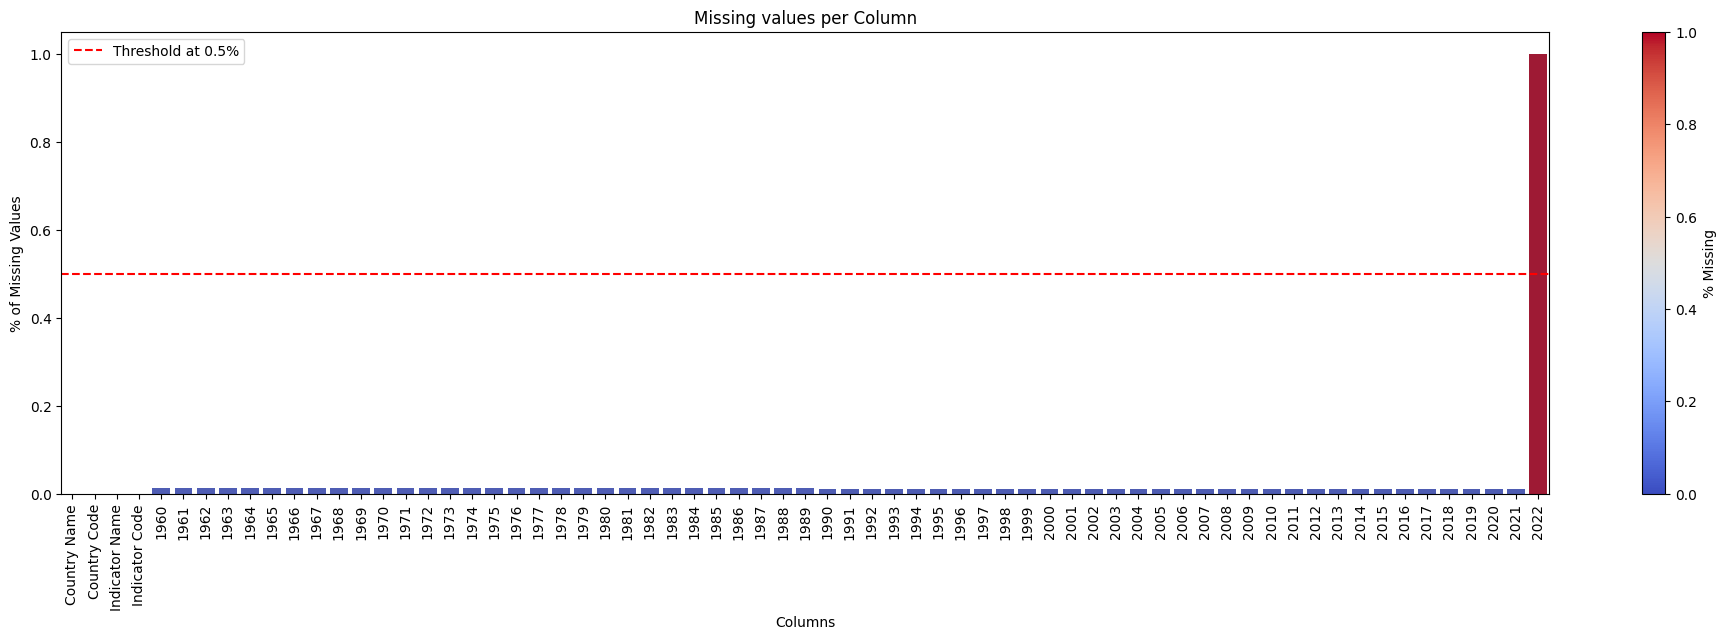

In [12]:
# Cleaning up the dataframe for obsolete columns after selection has been performed.
indicator_keep = 'SP.RUR.TOTL.ZS'
indicator_codes_unique = df['Indicator Code'].unique()
drop_indicators = [x for x in indicator_codes_unique if x not in indicator_keep]

# Use boolean indexing to select rows to drop and then use drop method
df.drop(df[df['Indicator Code'].isin(drop_indicators)].index, inplace=True)

# Check if the updated dataframe only contains the desired indicators
df['Indicator Code'].unique()

# Calculate the number of missing values per column
missing_values = df.isnull().sum()
missing_plot(missing_values,df.shape[0],'Missing values per Column',hline_y=0.5,hline=True,hline_label='Threshold at 0.5%')

# Dropping the year column that was mentioned earlier with too many missing values which is 2022
df.drop(columns=['2022'],inplace=True)

# Reindexing dataframe
df.reset_index(inplace=True,drop=True)

In [13]:
# The cleaned dataset after selecting appropiate indicators
df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,4.922400e+01,4.923900e+01,4.925400e+01,4.927000e+01,4.928500e+01,4.930000e+01,...,5.704300e+01,5.701000e+01,5.695900e+01,5.689200e+01,5.680800e+01,5.670700e+01,5.658900e+01,5.645400e+01,5.630300e+01,5.613400e+01
1,Aruba,ABW,Rural population,SP.RUR.TOTL,2.688000e+04,2.748100e+04,2.791800e+04,2.831800e+04,2.867300e+04,2.898000e+04,...,5.824800e+04,5.865200e+04,5.900600e+04,5.931400e+04,5.957700e+04,5.979100e+04,5.996300e+04,6.009100e+04,6.001100e+04,5.980300e+04
2,Africa Eastern and Southern,AFE,Rural population (% of total population),SP.RUR.TOTL.ZS,8.543619e+01,8.518859e+01,8.493075e+01,8.465202e+01,8.435981e+01,8.405872e+01,...,6.695953e+01,6.652379e+01,6.606304e+01,6.557442e+01,6.510525e+01,6.464110e+01,6.415240e+01,6.366374e+01,6.317170e+01,6.267630e+01
3,Africa Eastern and Southern,AFE,Rural population,SP.RUR.TOTL,1.116588e+08,1.142969e+08,1.170648e+08,1.198931e+08,1.228329e+08,1.258715e+08,...,3.699719e+08,3.777832e+08,3.855775e+08,3.934519e+08,4.012940e+08,4.090142e+08,4.168347e+08,4.247917e+08,4.327973e+08,4.405999e+08
4,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,9.159900e+01,9.131600e+01,9.102400e+01,9.072400e+01,9.041400e+01,9.009600e+01,...,7.584000e+01,7.562700e+01,7.541300e+01,7.519700e+01,7.498000e+01,7.475000e+01,7.450500e+01,7.424600e+01,7.397400e+01,7.368600e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,South Africa,ZAF,Rural population,SP.RUR.TOTL,8.818777e+06,9.039584e+06,9.293113e+06,9.558766e+06,9.834713e+06,1.012163e+07,...,1.951911e+07,1.950602e+07,1.953188e+07,1.965288e+07,1.955540e+07,1.934297e+07,1.929192e+07,1.925237e+07,1.919648e+07,1.909639e+07
528,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,8.185500e+01,8.104900e+01,8.021500e+01,7.928800e+01,7.798500e+01,7.662800e+01,...,5.964600e+01,5.913500e+01,5.861800e+01,5.809300e+01,5.756200e+01,5.702400e+01,5.647900e+01,5.592800e+01,5.537100e+01,5.480800e+01
529,Zambia,ZMB,Rural population,SP.RUR.TOTL,2.553409e+06,2.609333e+06,2.665887e+06,2.720673e+06,2.762825e+06,2.803071e+06,...,8.794599e+06,9.009203e+06,9.225180e+06,9.439084e+06,9.651859e+06,9.864042e+06,1.007353e+07,1.027983e+07,1.048046e+07,1.067283e+07
530,Zimbabwe,ZWE,Rural population (% of total population),SP.RUR.TOTL.ZS,8.739200e+01,8.717900e+01,8.691800e+01,8.642200e+01,8.590800e+01,8.538000e+01,...,6.716600e+01,6.734600e+01,6.749600e+01,6.761500e+01,6.770400e+01,6.776300e+01,6.779100e+01,6.779000e+01,6.775800e+01,6.769700e+01


Current shape of dataframe (532, 66)


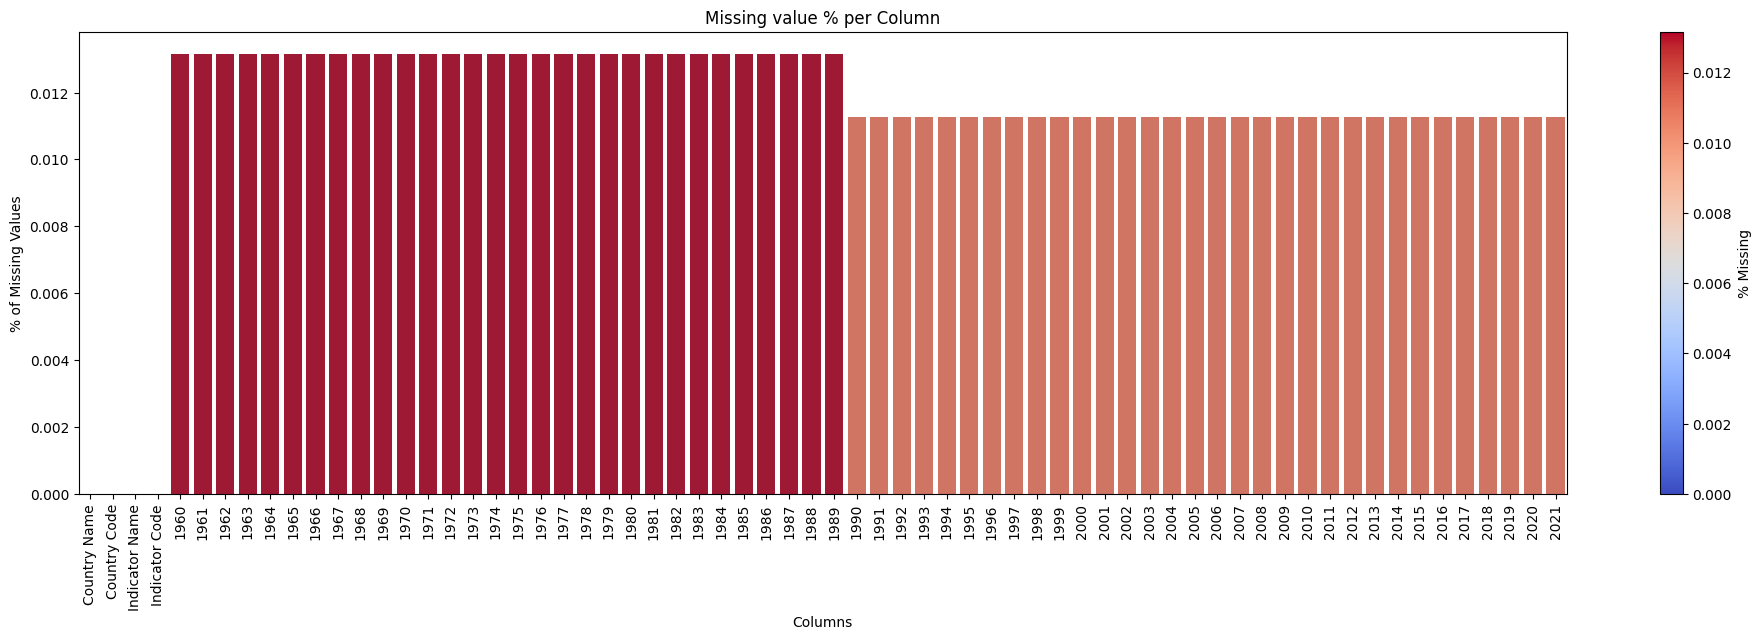

In [14]:
# Calculate the number of missing values per column - which has been reduced to below o.5% per column on average
print('Current shape of dataframe',df.shape)
missing_values = df.isnull().sum()
missing_plot(missing_values,df.shape[0],'Missing value % per Column',ylabel='% of Missing Values',hline_y=0.5,hline=False,hline_label='Threshold at 0.5%')

In [15]:
# Remaining missing value data e.g. for 1961
is_missing = df[df['1960'].isna()].index
df[df['1960'].isna()].head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
220,Not classified,INX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Not classified,INX,Rural population,SP.RUR.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,St. Martin (French part),MAF,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
295,St. Martin (French part),MAF,Rural population,SP.RUR.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,West Bank and Gaza,PSE,Rural population,SP.RUR.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,1010163.0,1024762.0,1038634.0,1051809.0,1064347.0,1073875.0,1089088.0,1103858.0,1118249.0,1132085.0
522,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
523,Kosovo,XKX,Rural population,SP.RUR.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# Selecting all year column indexes
years = df.columns[4:]

# Replace missing values with 0, in visualization if the value is exactly 0 we can show it as missing.
# Check if any of the year columns have non-NaN values
if df[years].notna().any().any():
    # At least one column has non-NaN values
    df[years] = df[years].interpolate(method='linear', axis=1, limit_direction='both')

# All year columns have NaN values
df.fillna(0,inplace=True)

# Show updated dataframe for the example of 1960 indexes
df.iloc[is_missing].head(15)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
220,Not classified,INX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,Not classified,INX,Rural population,SP.RUR.TOTL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,St. Martin (French part),MAF,Rural population (% of total population),SP.RUR.TOTL.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
295,St. Martin (French part),MAF,Rural population,SP.RUR.TOTL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393,West Bank and Gaza,PSE,Rural population,SP.RUR.TOTL,638796.0,638796.0,638796.0,638796.0,638796.0,638796.0,...,1010163.0,1024762.0,1038634.0,1051809.0,1064347.0,1073875.0,1089088.0,1103858.0,1118249.0,1132085.0
522,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,Kosovo,XKX,Rural population,SP.RUR.TOTL,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# For visualization purposes we will add column that contains the continent of each country based on the ISO_A3 code.
continents = []

for ISO_A3 in df['Country Code']:
    found = False  # Flag to check if a match is found
    for continent, codes in cleaned_iso.items():
        add = None
        if ISO_A3 in codes:
            if continent == 'Seven seas (open ocean)':
                add = 'Seven seas'
            else:
                add = continent
            continents.append(add)
            found = True  # Set the flag to True when a match is found
            break  # Exit the loop when a match is found
    if not found:
        continents.append('Unclassified')

df.insert(2, 'Continent', continents)

In [18]:
# Continent has been added to the dataframe at column index 2
continents = sorted(df['Continent'].unique())
continents

['Africa',
 'Asia',
 'Europe',
 'North America',
 'Oceania',
 'Seven seas',
 'South America',
 'Unclassified']

In [19]:
# The 53 Unclassified countries which ISO_A3 code was not found have to be removed or updated to belong to the correct continent
# Many here are aggregated values, we will manually select countries that will be updated.
unclassified_codes = df[df['Continent'] == 'Unclassified']['Country Code']

# France FRA Europe
# Norway NOR Europe
# Channel Islands CHI Europe
# Kosovo XKX Europe

print(df[df['Continent'] == 'Unclassified']['Country Name'].head(10))

keep_unclassified  = ['FRA','NOR','CHI', 'XKX']

# Update the continent for the specified country codes to 'Europe'
df.loc[df['Country Code'].isin(keep_unclassified), 'Continent'] = 'Europe'

2        Africa Eastern and Southern
3        Africa Eastern and Southern
6         Africa Western and Central
7         Africa Western and Central
14                        Arab World
15                        Arab World
72    Central Europe and the Baltics
73    Central Europe and the Baltics
76                   Channel Islands
77                   Channel Islands
Name: Country Name, dtype: object


In [20]:
# Proceed to drop all rows from unclassified which do not include 'FRA','NOR','CHI', 'XKX'
drop_unclassified_filtered = df['Country Code'].isin([code for code in unclassified_codes if code not in keep_unclassified])
# drop_unclassified_filtered
df = df.drop(df[drop_unclassified_filtered].index)

In [21]:
# Now that the dataset is cleaned and ready for visualization lets first do a final descriptive statistic exploration and visualizations.
mask_rural_pcnt = df['Indicator Code']  == 'SP.RUR.TOTL.ZS'
mask_rural_abs = df['Indicator Code']  == 'SP.RUR.TOTL'
# Set the float format to a fixed number of decimal places (e.g., 2)
pd.options.display.float_format = '{:.2f}'.format

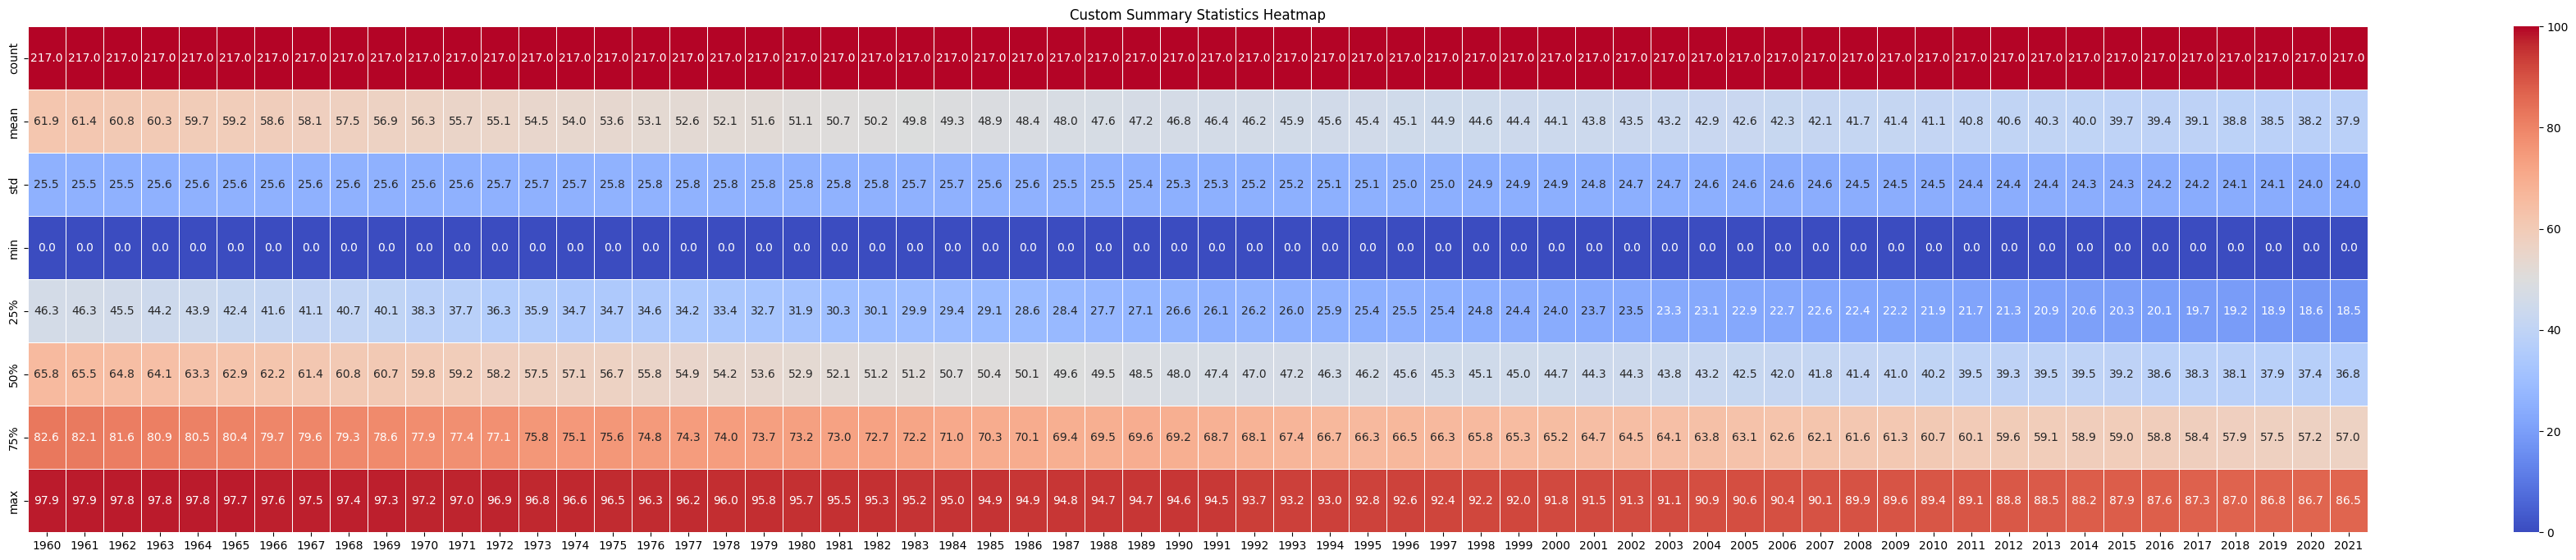

In [22]:
# In this summary we focus on Rural Population Percentage after the data is cleaned. We can clearly see a trend over the years, including the max, min, mean, std and quantiles.
summary_stats = df[mask_rural_pcnt].describe()
summary_stats = summary_stats

# Create a custom heatmap with a color gradient
plt.figure(figsize=(46, 8))

# Define a color map that spans the entire data range
# cmap = sns.diverging_palette(220, 0, sep=20, as_cmap=True)

# Create the heatmap using a diverging color map
sns.heatmap(data=summary_stats, annot=True, fmt=".1f", cmap=plt.cm.coolwarm, linewidths=0.5, cbar=True, vmin=0, vmax=100)

plt.title("Custom Summary Statistics Heatmap")
plt.show()

# Interesting trends become appearent like a continuous downtrend for the mean for all years.
# The standard deviation seems stable from 1960 to 1971, then it increases slightly till 1982 and start to drop again continuously until 2021.
# Convergence might indicate that the differences in rural population percentages between regions or countries are diminishing over time. In other words, regions that previously had very different rural population percentages are becoming more similar.
# A convergence in rural population percentages can be a sign of urbanization. As urbanization progresses, more people move from rural to urban areas, which can lead to a decrease in the rural population percentage across regions or countries.
# It could be associated with economic development. More economically developed regions or countries often experience a shift from agriculture-based economies 
# (which tend to have higher rural populations) to more industrial or service-based economies (which tend to have lower rural populations).
# Changes in government policies, rural development programs, and social trends can influence the rural population percentages. Convergence may indicate that such policies and trends are leading to more consistent living patterns.

In [23]:
# In this summary we focus on Total Rural Population  after the data is cleaned.
# For the absolute values there is also a trend however big countries will skew the data and countries with small population will not contribute much.
# This is also the reason why we use Rural Percentage in the interactive geo-spatial visualization later on.
# Big numbers like these are also hard to show display in heatmap, scientific notation will not make it more pretty either.

# It's hard to tell if the world population is increasing or that the rural population is growing making it even harder to draw conclusions from.
# One thing that is interesting is the standard deviation, which tends to converge later on, meaning that the population is having less and less spread among the mean.
# This trend can also be observed in the quantiles. The max value increases year on year.
df[mask_rural_abs].describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,217.00,217.00,217.00,217.00,217.00,217.00,217.00,217.00,217.00,217.00,...,217.00,217.00,217.00,217.00,217.00,217.00,217.00,217.00,217.00,217.00
mean,9242237.37,9297597.40,9399710.51,9544114.64,9686403.48,9854133.05,10030812.91,10203743.68,10381140.81,10566198.54,...,15612661.88,15657248.08,15695498.09,15725747.31,15753037.37,15777295.42,15794266.93,15804329.86,15808653.40,15795307.20
std,45917118.87,45738424.96,46114811.48,46989459.07,47831962.01,48989428.08,50277660.80,51509854.56,52795218.65,54167220.47,...,75242808.02,75129858.68,74979015.57,74790449.38,74598175.38,74402213.10,74157059.42,73872982.73,73548797.71,73130431.63
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,95585.00,95285.00,97259.00,99793.00,102252.00,106504.00,109044.00,111320.00,113263.00,114563.00,...,189049.00,190952.00,193185.00,196468.00,197461.00,199529.00,201507.00,203532.00,201999.00,199225.00
50%,1484612.00,1495129.00,1520350.00,1555138.00,1600343.00,1579815.00,1578912.00,1617126.00,1616181.00,1570746.00,...,1912076.00,1897456.00,1898380.00,1861795.00,1826891.00,1792408.00,1759939.00,1738221.00,1718119.00,1654279.00
75%,4798172.00,4853778.00,4854036.00,4903678.00,4953633.00,5019280.00,5055318.00,5106858.00,5122818.00,5128878.00,...,9751197.00,9681760.00,9590865.00,9535148.00,9651859.00,9778365.00,9995643.00,10279833.00,10376129.00,10221684.00
max,558984648.00,550002064.00,551084460.00,561172774.00,570563019.00,585836641.00,603653090.00,620353282.00,637762514.00,656497738.00,...,871315929.00,877931069.00,883907800.00,889270551.00,894450030.00,899185932.00,903131481.00,906325664.00,908684959.00,909384771.00


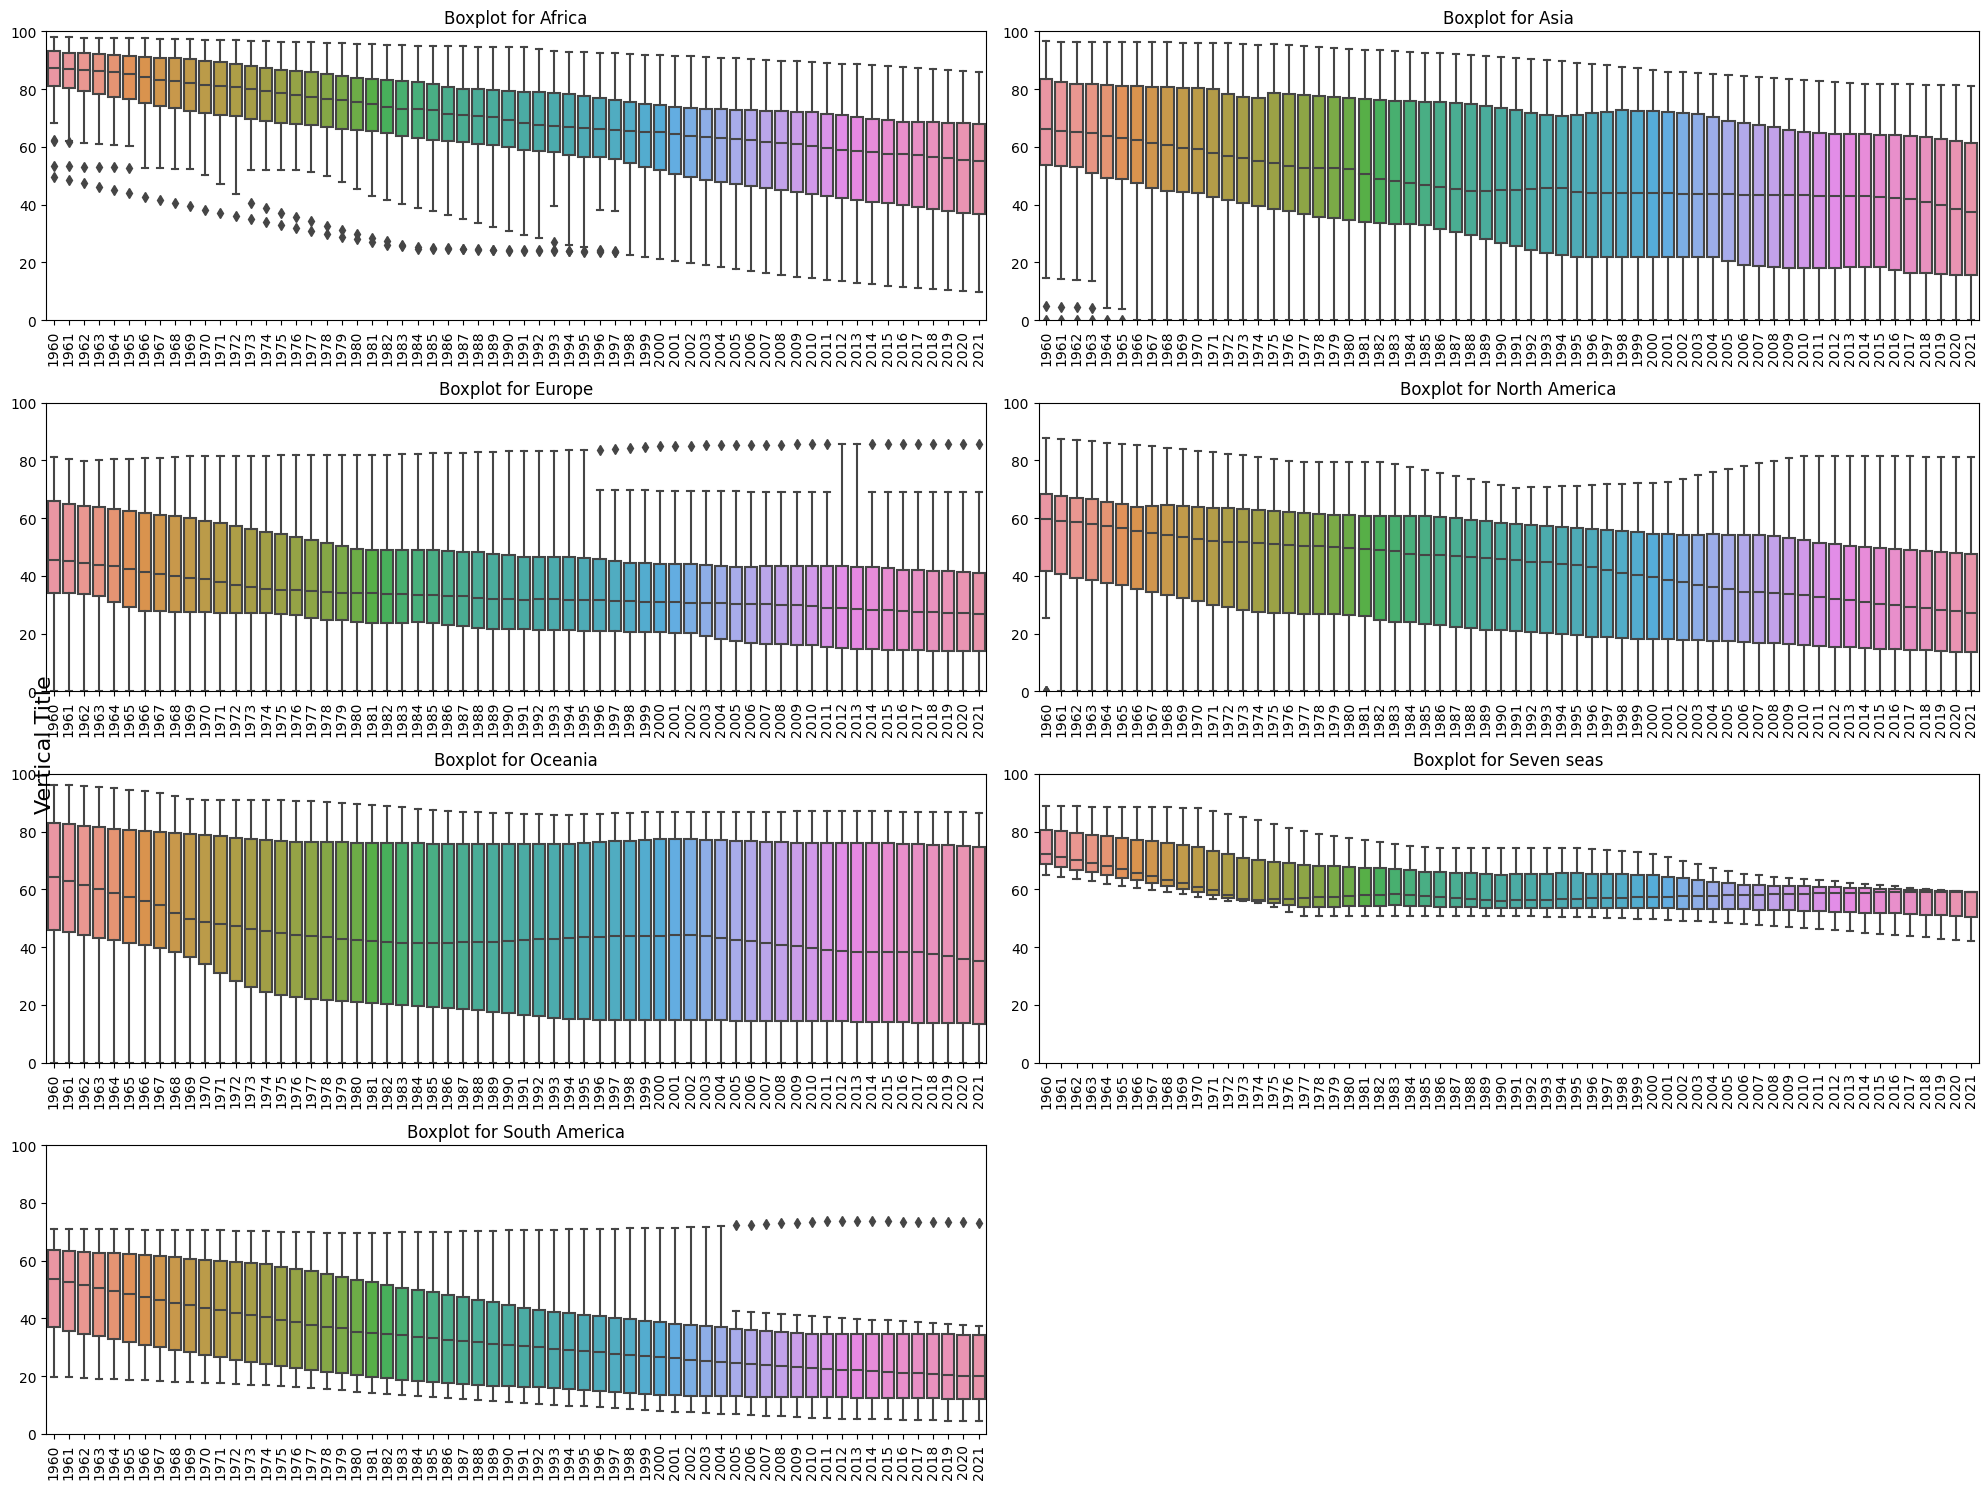

In [24]:
# From now the focus will be on Rural Percentages since these absolute numbers of total population are hard to put into perspective.
# Here is a boxplot showing the same but in a more visual trend.

# Assuming df is your DataFrame with the data
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
num_continents = len(continents) - 1
grouped_continents = df[mask_rural_pcnt].groupby("Continent")

# Calculate the number of rows based on the number of continents and two columns
num_rows = (num_continents // 2) + (num_continents % 2)

for i, continent in enumerate(continents, 1):
    if continent == 'Unclassified':
        continue
    plt.subplot(num_rows, 2, i)  # Create a subplot for each continent in a grid with num_rows rows and 2 columns

    # Create a boxplot for the current continent
    sns.boxplot(
        data=grouped_continents.get_group(continent)[years],
    )
    plt.title(f'Boxplot for {continent}')
    plt.ylabel('')
    plt.xticks(rotation=90)
    plt.ylim(0,100)

fig = plt.gcf()
fig.text(0.02, 0.5, 'Vertical Title', rotation=90, va='center', fontsize=16)
plt.tight_layout()  # Adjust subplot layout for better spacing
plt.show()

# For each continent a grouped boxplot is created, further revealing trends around the world.
# All of them show a general downtrend in rural population %.
# Africa is still has most people living in rural areas, most outliers also don't go as low as continents like Asia, Europe, Oceania.
# Seaven Seas and South America also have less outliers to the downside.
# Continents like Europa, Asia, North America and Oceania in general are more developed and larger populations live in Urban areas lowering the Rural Populuation percentages.
# Seaven seas trend is very confined, mostly since it consists of few countries and most of them are small. This could be a reason for the low variation since changes are going slow.

In [25]:
# Now that we understand the data better we can enhance the exploration by using the following dash-plotly interactive geospatial visualization.
# Countries can be grouped by continent by hovering over the boxplot continents.
# One can highlight a country by hovering over it in the chloropleth map and see more information by hovering over the different elements.
# For more information please visit the github repositiory: https://github.com/DeusNexus/iu-exploratory-data-analysis

In [26]:
# Run all three cells below and go to the localhost url where the dashboard is hosted.

# Import necessary modules for creating the dashboard
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

# Assuming you have a list of years defined somewhere in your code
# Extract the minimum and maximum years from the list
years = [int(year) for year in years]  # Convert the list of years to integers
min_year = min(years)  # Find the minimum year
max_year = max(years)  # Find the maximum year

# Create a Dash web application
app = dash.Dash(__name__)

# Assuming you have a DataFrame 'df' and you want to filter it
# to only include rows where 'Indicator Code' is 'SP.RUR.TOTL.ZS'
df_rural = df[df['Indicator Code'] == 'SP.RUR.TOTL.ZS']

# Calculate median values for each continent for the initial year (1960)
median_values = df_rural.groupby("Continent")[str(1960)].median().sort_values(ascending=False).index

# Add "world" to the list of continents
median_values = ["World"] + list(median_values)

# Create a new DataFrame that includes data for all countries (world)
df_world = df_rural.copy()
df_world["Continent"] = "World"


In [27]:
# Define the layout of the dashboard for init
app.layout = html.Div(
    id='app-container',
    style={
        "display": "flex",
        "flex-direction": "column",
        "align-items": "center",
        "justify-content": "space-between",
        "backgroundColor": "white",
        "padding": "5px",
        "margin": "0",
        "width": "100%",
        "height": "99vh",
        "overflow-y": "hidden",
        "box-sizing": "border-box",
        "font-family": "Arial",
    },
    children=[
        ## Hidden Divs
        html.Div(id='selected-year', style={'display': 'none'}),
        html.Div(id='hovered-country', style={'display': 'none'}),
        ######### App content #########
        # Contains the title and some infoSS
        html.Div(
            id='header-container',
            style={
                "backgroundColor": "black",
                "padding": "10px",
                "width": "100%",
                "height": "8%",
                "box-sizing": "border-box",
                "display": "flex",
                "flex-direction": "row",
                "align-items": "center",
                "justify-content": "center",
            },
            children=[
                html.Div(
                    id='title-container',
                    style={
                        "backgroundColor": "black",
                        "flex": "2",
                        "margin": "2px 0",
                    },
                    children=[
                        html.H1("Interactive Geo Data Visualization", style={'text-align': 'center','color':'white'}),
                        html.H4("WorldBank Dataset: Agriculture & Rural Development ", style={'text-align': 'center','color':'white'}),
                    ]
                ),
                html.Div(
                    id='info-container',
                    style={
                        "backgroundColor": "black",
                        "flex": "1",
                        "flex-direction":"column",
                        "justify-content":"center",
                        "align-items":"center",
                        "font-weight": "bold",
                        "font-size":"12px",
                    },
                    children=[
                        html.P("Animation playback speed can be adjusted, slow connection or pc it is advised to use above 500ms refresh rate.", style={'text-align': 'right','color':'white'}),
                        html.P("Hovering over the boxplot will show the countries of a continent. Hover over World to see all countries again.", style={'text-align': 'right','color':'white'}),
                        html.P("Hovering over the choropleth will show the country in the barplot and highlight it's position in the histogram.", style={'text-align': 'right','color':'white'}),
                    ]
                ),
            ]
        ),
        # End of title and info container

        # Contains the graphs
        html.Div(
            id='content-container',
            style={
                "backgroundColor": "white",
                "padding": "5px",
                "width": "100%",
                "height": "100%",
                "box-sizing": "border-box",
                "display": "flex",
                "flex-direction": "column",
                "justify-content": "space-between",
            },
            children=[
                html.Div(
                    id='top-container',
                    style={
                        "backgroundColor": "white",
                        "flex": "6",
                        "display": "flex",
                        "flex-direction": "row",
                        "justify-content": "space-between",
                    },
                    children=[
                        html.Div(
                            id='left-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "3",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                id='chloropleth-map',
                                figure=px.choropleth(
                                    df_rural,
                                    locations='Country Code',
                                    color=str(min_year),  # Initialize with the minimum year
                                    hover_name='Country Name',
                                    hover_data=['Continent','Country Code'],
                                    title=f'Choropleth Map of Rural Percentage ({str(min_year)})',
                                    projection='equirectangular',
                                    color_continuous_scale='Viridis',
                                    color_continuous_midpoint=50,
                                    range_color=[0, 100],
                                ).update_layout(
                                    title={'x': 0.5},
                                    margin={'l': 0, 'r': 0, 't': 50, 'b': 0},
                                    hovermode='closest',
                                    dragmode=False
                                ),
                                    # Chloropleth Style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                        html.Div(
                            id='right-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "1",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                    id='barplot',
                                    figure=px.bar(
                                        df_rural[df_rural['Country Name'] == 'China'] \
                                            .melt(
                                                id_vars=['Country Name', 'Country Code', 'Continent', \
                                                         'Indicator Name', 'Indicator Code'], 
                                                var_name='Year', 
                                                value_name='Rural population Pcnt.'),
                                        x='Rural population Pcnt.', 
                                        y='Year', 
                                        hover_data=['Country Code', 'Country Name','Rural population Pcnt.','Year'],
                                        orientation='h',
                                        color='Rural population Pcnt.',
                                        color_continuous_scale='Bluered_r',
                                        color_continuous_midpoint=50,
                                        range_color=[0, 100],
                                        title=f'Hover-over: Rural Population (% of Total Population) in {"CHN"}',
                                    ).update_layout(
                                        dragmode=False,
                                        title={'x': 0.5},
                                        showlegend=False,
                                    ),
                                    # Bar Style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                    ]
                ),
                html.Div(
                    id='bottom-container',
                    style={
                        "backgroundColor": "white",
                        "flex": "4",
                        "display": "flex",
                        "flex-direction": "row",
                        "justify-content": "space-between",
                    },
                    children=[
                        html.Div(
                            id='bottom-left-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "1",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                    id='box',
                                    figure=px.box(
                                        pd.concat([df_world,df_rural]),
                                        x="Continent", 
                                        y=str(1961),
                                        color='Continent',
                                        category_orders={"Continent": median_values},  # Order by descending medians
                                        title=f'Box Plot of Rural Percentage (1961)',
                                    ).update_layout(
                                        title={'x': 0.5},
                                        dragmode=False,
                                    ).update_traces(
                                        showlegend=False
                                    ).update_yaxes(
                                        title="Population % Living in Rural Areas",
                                        range=[0, 100],
                                    ).update_xaxes(
                                        title="Grouped by Continent",
                                    ),
                                    # Box style
                                    style={'flex': '1', 'width': '100%','height':'100%'}
                                )
                            ]
                        ),
                        html.Div(
                            id='bottom-right-graph',
                            style={
                                "backgroundColor": "white",
                                "flex": "1",
                                "padding": "5px",
                                "border": "1px solid black",
                            },
                            children=[
                                dcc.Graph(
                                    id='histogram',
                                    figure=go.Figure(
                                        data=[
                                            go.Histogram(
                                                x=df_rural[str(1961)],
                                                nbinsx=20,
                                                xbins=dict(
                                                    start=0,
                                                    end=100,
                                                    size=5  # Set the bin size to 5 to create 5% intervals
                                                ),
                                                name='All Countries',
                                                marker=dict(color='lightgray', line=dict(width=2)),  # Change the color and line properties as needed
                                                opacity=0.7,
                                            ),
                                        ],
                                        layout=dict(
                                            title=f'Histogram Bins of Rural Percentage Globally (1961)',
                                            xaxis_title="Percentage Range Bins",
                                            yaxis_title="Number of Countries",
                                            yaxis=dict(range=[0, 30]),  # Set the y-axis range to [0, 30]
                                            xaxis=dict(range=[0, 100],dtick=5),  # Set the x-axis range to [0, 100] and dtick to 5
                                            dragmode=False,
                                        )
                                    ),
                                    style={'flex': '1', 'width': '100%', 'height': '100%'}
                                )
                            ]
                        ),

                    ]
                ),
            ]
        ),
        # End of graph container

        # Contains the play controlls
        html.Div(
            id='footer-container',
            style={
                "backgroundColor": "black",
                "padding": "10px 0",
                "width": "100%",
                "display": "flex",
                "flex-direction": "row",
                "justify-content": "space-between",
                "borderRadius": "5px",
            },
            children=[
                html.Div(
                    id='footer-child-1',
                    style={
                        "backgroundColor": "black",
                        "flex": "none", 
                        "width": "100px",
                        "margin": "0 10px",
                    },
                    children=[
                        # Play/pause button
                        html.Button(
                            "Play",
                            id="play-button",
                            n_clicks=0,
                            style={'flex': '1', 'width': '100%','height':'100%'}
                        ),
                    ]
                ),
                html.Div(
                    id='footer-child-2',
                    style={
                        "backgroundColor": "black",
                        "flex": "8",
                        "margin": "0 10px", 
                        "fontWeight": "bold",
                        "borderRadius": "5px",
                    },
                    children=[
                        # Slider for selecting years
                        dcc.Slider(
                            id='year-slider',
                            min=min_year,
                            max=max_year,
                            step=1,
                            value=min_year,
                            marks={str(year): str(year) for year in years},
                            included=False,
                        ),
                        # Interval component for animation
                        dcc.Interval(
                            id='animation-interval',
                            interval=300,  # Interval in milliseconds
                            disabled=True,  # Initially disabled
                        ),
                        html.Div(
                            style={
                                'color':'white',
                                'textAlign':'center',
                            },
                            children=[
                            html.Label('Animation Speed (Milliseconds) - Lower is Faster'),
                            dcc.Slider(
                                id='speed-slider',
                                min=50,  # Minimum interval value in milliseconds
                                max=800,  # Maximum interval value in milliseconds
                                step=50,  # Step size for the slider
                                value=500,  # Initial value of the interval in milliseconds
                            ),
                        ]),
                    ]
                ),
            ]
        )
        # End of play controls container
    ##### End of App content ######
])

In [28]:
# In your callback function
@app.callback(
    Output('year-slider', 'value'),  # Output: Update the value of the year slider
    Input('animation-interval', 'n_intervals'),  # Input: n_intervals from animation interval
    Input('year-slider', 'value'),  # Input: Current value of the year slider
    Input('play-button', 'n_clicks'),  # Input: Clicks on the play button
    Input('year-slider', 'max'),  # Input: Maximum value of the year slider
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_selected_year(n_intervals, slider_value, play_button_clicks, max_year):
    if play_button_clicks % 2 == 1:
        # Play button is clicked, start animation
        if slider_value < max_year:
            slider_value += 1
        else:
            slider_value = min_year
    return slider_value

# Callback to update the hovered country in the hidden div
@app.callback(
    Output('hovered-country', 'children'),  # Output: Update the content of the hidden div for hovered country
    Input('chloropleth-map', 'hoverData'),  # Input: Hover data from the choropleth map
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_hovered_country(hover_data):
    if hover_data is not None and 'points' in hover_data:
        country_name = hover_data['points'][0]['hovertext']
        return country_name
    else:
        return ''

# Callback to update the box hover data based on the selected continent
@app.callback(
    Output('box', 'hoverData'),  # Output: Update hover data for the box plot
    Input('box', 'selectedData'),  # Input: Selected data in the box plot
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_box_hover(selected_data):
    if selected_data is not None and 'points' in selected_data:
        selected_continent = selected_data['points'][0]['x']
        if selected_continent == "World":
            # Return hover data for "World" (all countries)
            selected_continent = None

        return {'points': [{'x': selected_continent}]}
    else:
        return {'points': []}

# Define callback functions
@app.callback(
    Output('chloropleth-map', 'figure'),  # Output: Update the choropleth map figure
    Input('year-slider', 'value'),  # Input: Selected year from the year slider
    Input('box', 'hoverData'),  # Input: Hover data from the box plot
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_choropleth_animation(selected_year, box_hover_data):
    # Initialize the filtered DataFrame with all countries
    filtered_df = df_rural.copy()

    if box_hover_data is not None and 'points' in box_hover_data:
        selected_continent = box_hover_data['points'][0]['x']
        if selected_continent != "World":
            # Filter the DataFrame to get data for the selected continent and year
            filtered_df = df_rural[df_rural['Continent'] == selected_continent]

    fig = px.choropleth(
        filtered_df,
        locations='Country Code',
        color=str(selected_year),
        hover_name='Country Name',
        hover_data=['Continent', 'Country Code'],
        title=f'Choropleth Map of Rural Percentage ({str(selected_year)})',
        projection='equirectangular',
        color_continuous_scale='Viridis',
        color_continuous_midpoint=50,
        range_color=[0, 100],
    ).update_layout(
        title={'x': 0.5},
        margin={'l': 0, 'r': 0, 't': 50, 'b': 0},
        hovermode='closest',
        dragmode=False,
    )

    return fig

@app.callback(
    Output('barplot', 'figure'),  # Output: Update the bar plot figure
    Input('hovered-country', 'children'),  # Input: Hovered country name
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_barplot_animation(hover_country):
    # Update the figure with the new year
    bar_fig = px.bar(
        df_rural[df_rural['Country Name'] == hover_country].melt(
            id_vars=['Country Name', 'Country Code', 'Continent', 'Indicator Name', 'Indicator Code'],
            var_name='Year',
            value_name='Rural population Pcnt.'
        ),
        x='Rural population Pcnt.',
        y='Year',
        hover_data=['Country Code', 'Country Name', 'Rural population Pcnt.', 'Year'],
        orientation='h',
        color='Rural population Pcnt.',
        color_continuous_scale='Bluered_r',
        color_continuous_midpoint=50,
        range_color=[0, 100],
        title=f'Hover-over: Rural Population (% of Total Population) in {hover_country}',
    ).update_layout(
        title={'x': 0.5},
        dragmode=False,
        showlegend=False,
    ).update_yaxes(autorange="reversed")

    return bar_fig

@app.callback(
    Output('box', 'figure'),  # Output: Update the box plot figure
    Input('year-slider', 'value'),  # Input: Selected year from the year slider
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_box_animation(selected_year):
    # Calculate median values for each continent
    median_values = df_rural.groupby("Continent")[str(selected_year)].median().sort_values(ascending=False).index

    # Add "world" to the list of continents
    median_values = ["World"] + list(median_values)

    # Create a DataFrame that includes data for all countries (world)
    df_world = df_rural.copy()
    df_world["Continent"] = "World"

    # Update the figure with the new year
    box_fig = px.box(
        pd.concat([df_rural, df_world]),  # Concatenate the data for all continents including "world"
        x="Continent",
        y=str(selected_year),
        color='Continent',
        category_orders={"Continent": median_values},  # Order by descending medians
        title=f'Scatter Plot of Rural Percentage ({str(selected_year)})',
    ).update_layout(
        title={'x': 0.5},
        hovermode='closest',
        dragmode=False
    ).update_traces(
        showlegend=False
    ).update_yaxes(
        range=[0, 100],
        title="Population % Living in Rural Areas",
    ).update_xaxes(
        title="Grouped by Continent",
    )

    return box_fig

# Callback to update the histogram based on the selected country and year slider
@app.callback(
    Output('histogram', 'figure'),  # Output: Update the histogram figure
    Input('hovered-country', 'children'),  # Input: Hovered country name
    Input('year-slider', 'value'),  # Input: Selected year from the year slider
    Input('year-slider', 'drag_value'),  # Input: Drag value of the year slider
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def update_histogram_on_hover(selected_country, selected_year, drag_value):
    # Determine whether the callback was triggered by a hover event or slider value change
    ctx = dash.callback_context
    triggered_component = ctx.triggered[0]['prop_id'].split('.')[0]

    if triggered_component == 'year-slider':
        # Slider value changed, update the histogram based on the selected year
        if selected_country is None:
            selected_country = "All Countries"  # Default country when slider changes

    elif triggered_component == 'chloropleth-map':
        # Hover event, use the stored selected country
        if selected_country is None:
            selected_country = "All Countries"  # Default country when no hover event

    # Create a histogram trace for all countries with consistent bin settings
    histogram_trace = go.Histogram(
        x=df_rural[str(selected_year)],  # Update this to the appropriate year or column
        nbinsx=20,
        xbins=dict(
            start=0,
            end=100,
            size=5  # Set the bin size to 5 to create 5% intervals
        ),
        name='All Countries',
        marker=dict(line=dict(width=2)),  # Change the color and line properties as needed
        opacity=0.7,
    )

    # Create a list of shapes to highlight the selected country's bin
    shapes = []

    if selected_country != "All Countries":
        # Filter the DataFrame to get data for the selected country
        filtered_df = df_rural[df_rural['Country Name'] == selected_country]

        # Calculate the bin edges and highlight the selected country's bin
        hist, edges = np.histogram(filtered_df[str(selected_year)], bins=20, range=[0, 100])
        selected_bin_index = np.digitize(filtered_df.iloc[0][str(selected_year)], edges) - 1

        # Calculate the center of the selected bin
        center = (edges[selected_bin_index] + edges[selected_bin_index + 1]) / 2

        # Highlight the selected bin with a different color
        shapes.append(
            dict(
                type='rect',
                x0=center - 2.5,  # Adjust the x0 and x1 to center the shape
                x1=center + 2.5,
                y0=0,
                y1=max(hist),
                xref='x',
                yref='y',
                fillcolor='red',  # Change the color as needed
                opacity=1,
                layer='above',  # Place the shape above the bars
                line=dict(width=2, color='black'),  # Add a black outline
            )
        )

    # Create the histogram figure with the histogram trace and shapes
    histogram_fig = go.Figure(data=[histogram_trace], layout=dict(shapes=shapes))
    histogram_fig.update_layout(
        title=f'Histogram Bins of Rural Percentage Globally ({selected_year}) Hover Country: {selected_country}',
        xaxis_title="Percentage Range Bins",
        yaxis_title="Number of Countries",
        dragmode=False,
        yaxis=dict(range=[0, 30]),  # Set the y-axis range to [0, 30]
        xaxis=dict(range=[0, 100],dtick=5),  # Set the x-axis range to [0, 100]
    ).update_layout(
        title={'x': 0.5},
    )

    return histogram_fig

@app.callback(
    Output('play-button', 'children'),  # Output: Update the play button label
    Output('animation-interval', 'disabled'),  # Output: Enable/disable the animation interval
    Input('play-button', 'n_clicks'),  # Input: Clicks on the play button
    Input('animation-interval', 'disabled'),  # Input: Animation interval status (disabled/enabled)
    prevent_initial_call=True  # Prevent initial call when the app starts
)
def toggle_play_pause(n_clicks, interval_disabled):
    if n_clicks % 2 == 1:
        return "Pause", False
    else:
        return "Play", True

# Set animation speed
@app.callback(
    Output('animation-interval', 'interval'),  # Output: Update the animation interval
    Input('speed-slider', 'value')  # Input: Speed value from the speed slider
)
def update_animation_interval(speed_value):
    interval_value = speed_value
    return interval_value

# Display the app within the Jupyter Notebook cell
display(HTML("<style>.container { width:100% !important; font-family: Ubuntu;}</style>"))
# app.run_server(debug=True, use_reloader=False)
app.run(jupyter_mode="tab")


Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

In [29]:
# End of Notebook